In [1]:
# import libraries
import matplotlib.pyplot as plt
from openpile.construct import Pile, SoilProfile, Model, Layer
from openpile.core.soilmodels import API_sand
from openpile.core.py_curves import api_sand
from openpile.analyses import simple_winkler_analysis

In [2]:
# create pile
pile = Pile.create(name = "WTG01",
        kind='Circular',
        material='Steel',
        top_elevation = 0,
        pile_sections={
            'length':[10,30],
            'diameter':[7.5,7.5],
            'wall thickness':[0.07, 0.08],
        } 
    )

In [3]:
sp = SoilProfile(
    name="BH01",
    top_elevation=0,
    water_elevation=0,
    layers=[
        Layer(
            name='Layer0',
            top=0,
            bottom=-40,
            weight=9,
            lateral_model= API_sand(phi=30, Neq=100)
        )
    ]
)

In [4]:
# create mesh
M = Model.create(name="", pile=pile, soil=sp)

In [5]:
# create point load
# mesh.set_support(elevation=-10, )
M.set_support(elevation=-40, Tx = True)
M.set_pointdisplacement(elevation=0, Ty=0.1)
# M.set_pointload(elevation=0,Px=-20000, Py=500000)


In [6]:
result = simple_winkler_analysis(model=M)

Converged at iteration no. 3


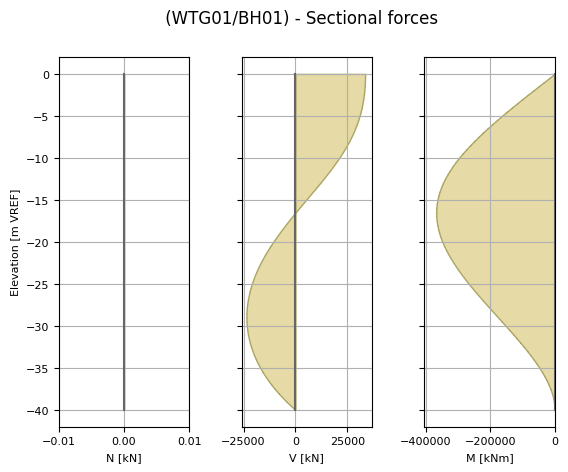

In [8]:
result.plot_forces()